# BUISNESS CASE: BASED ON GIVEN FEATURE WE NEED TO PREDICT THE LEAD CATEGORY OF CUSTOMER [HIGH POATENTIAL, LOW POTENTIAL]

## TASK: CLASSIFICATION

## INTRODUCTION OF PROJECT
* FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. 
* FicZon major leads generation channel is digital and through their website. 
* FicZon business is majorly dependent on the sales force effectiveness. 
* As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. 
* Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. 
* Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.
* FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness


## PROJECT GOAL
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)



### PROJECT IS DEVICE INTO CERTAIN STEPS:
1. Featching data from data-base.
2. Domain analysis.
3. EDA: [Univariate, Bivariate & Multivariate analysis condition]
4. Data preprocessing/Feature Engineering.
5. Feature selection.
6. Model creation.
7. Model Evaluation.
8. Model Saving.

### IMPORTING NECESSARY LIBRARY 

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### MAKING CONNECTION TO DATA BASE SERVER

In [2]:
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user ='dm_team2', # data-base Username
                                    password ='DM!$Team&27@9!20!',
                                    database ='project_sales') # data-base Password

### FETCHING DATA FROM DATA BASE

In [3]:
query = "select * from data"
data = pd.read_sql(query,connection)
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True) # Remove special character
data.head()


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


### BASIC CHECKS

In [4]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


In [5]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28042018 0945,9,Call,,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,LOST
7418,28042018 0943,15,Call,,VALUE!,SalesAgent12,Other Locations,Mode5,LOST
7419,28042018 0920,5,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Not Responding
7420,28042018 0804,21,CRM form,,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Just Enquiry
7421,28042018 0754,25,Website,,cXXXXXXXgmailcom,SalesAgent3,Chennai,Mode1,CONVERTED


In [6]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

* In this data total 9 Features with 3 unique feature

In [7]:
data.shape

(7422, 9)

* Total 7422 observation with 9 feature

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


* All feature data type is object

In [9]:
data.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,479,882,13,18,5,11
top,26092018 1130,18,Call,,VALUE!,SalesAgent4,Other Locations,Mode5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


* No constant feature is available

### DOMAIN ANALYSIS:


#### *Sales effectiveness:
Sales effectiveness refers to the ability of a company's sales professionals to “win” at each stage of the customer's buying process, and ultimately earn the business on the right terms and in the right timeframe. Improving sales effectiveness is not just a sales function issue; it's a company issue, as it requires deep collaboration between sales and marketing to understand what is working and not working, and continuous improvement of the knowledge, messages, skills, and strategies that sales people apply as they work sales opportunities.

Sales effectiveness has historically been used to describe a category of technologies and consulting services aimed at helping companies improve their sales results.

#### *Sales force effectiveness:
The purpose of sales force effectiveness is to increase company revenues through increased customer acquisition, product/service sales, and up-selling/cross-selling additional products and services. The purpose of sales force effectiveness metrics is "to measure the performance of a sales force and of individual salespeople.

When analyzing the performance of a salesperson, a number of metrics can be compared. These can reveal more about the salesperson than can be gauged by his or her total sales. When analyzing the performance of a sales team, an increase in revenue-per-rep can indicate improvement in salesforce effectiveness.


#### Target variable == Status
* In target veriable 11 labels are present (Junk Lead,Not Responding,CONVERTED,Just Enquiry,Potential,Long Term,In Progress Positive,In Progress Negative,LOST,Open,converted ) 
* This all labels is tell about the customer lead category [high potential, low potential] 

#### 1.Created:
* This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

#### 2.Product ID:
* Id of particular product.

#### 3.Source:
* The source is contain imformation about the customer systematic search like call, live chats, and campaign.

#### 4.Mobile:
* This is a unique feature contain a Mobile no of customer.


#### 5.Email:
* This also unique feature contain a Email-id of customer.

#### 6.Sales Agent:
* Sales agent is a front line customer service, A person or a company that acts as a sales agent on behalf of the exporting company ( principal ), introducing its products to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principal.

#### 7.Location:
* The Location of sale field always has the main business address in it and has to be changed manually. This also means that the sales tax is computed based on the main business address and not the actual location of the sale.
* This feature contain lots of different location.

#### 8.Delivery mode:
* Modes of Delivery of goods Delivery of goods may be made in any of the following three ways: 
1. Actual Delivery: Also known as physical delivery, actual delivery takes place when the goods are physically handed over by the seller or his/her authorized agent to the buyer or his/her agent authorized to take possession of the goods.

2. Symbolic Delivery: Where the goods are bulky and heavy and it is not possible to physically hand them over to the buyer, delivery thereof may be made by indicating or giving a symbol. Here the goods itself are not delivered, but the means of obtaining possession of goods is delivered.

3. Constructive Delivery: In this case neither physical nor symbolic delivery is made. In constructive delivery the individual possessing the products recognizes that he holds the merchandise for the benefit of, and at the disposal of the purchaser. Constructive delivery is also called attornment.

#### 9. Status:
* This is a target variable tell about the lead category of customer.[high potential, low potential]


### DATA SUMMARY:
* The data is supervised and categorical as well as all feature is nominal including target veriable.
* In this data three feature are unique so we can not perform any analysis on this feature.
* All feature is contain lots of different label so we compressed and merged the labels such that only the main ones were included
* In this data some feature contain blank spaces so we need to replace with NAN values.
* No scaling required as well as no need to handle outlier
* Used encoding technique to handle categorical feature
* No need to handle duplicates because of Im mereged and compressed label.



                   

### EXPLOTARY DATA ANALYSIS

#### UNIVARIATE ANALYSIS

##### 1.PRODUCT ID

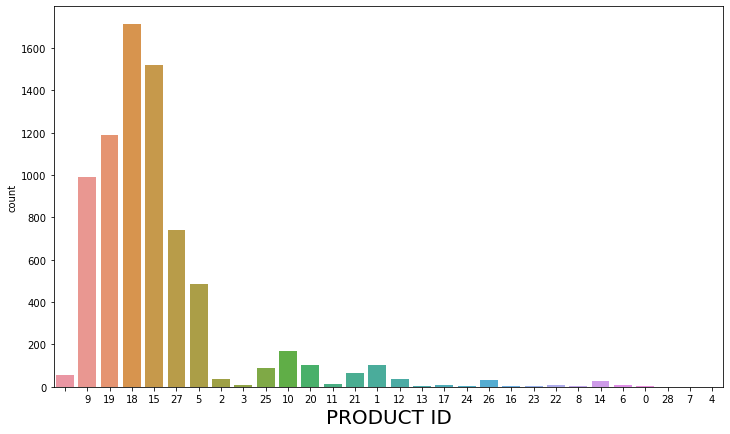

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(data.Product_ID)
plt.xlabel('PRODUCT ID',fontsize=20)
plt.show()

##### OBSERVATION:
* In this plot we are clearly seen that 18,15,19,27,9 and 5 Product ID has more sold product.
* Remaining all product ID has less sold product.

##### 2.SOURCE

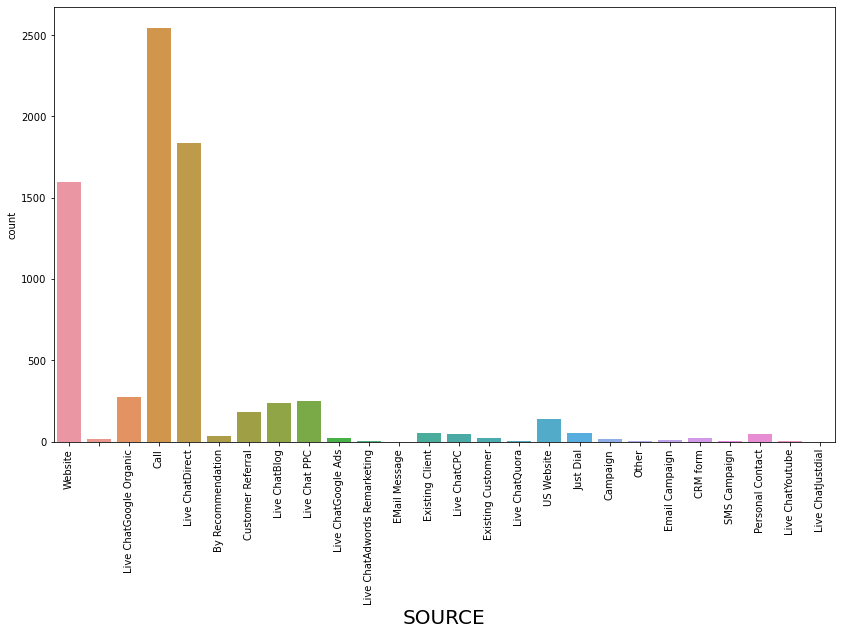

In [11]:
plt.figure(figsize=(14,8))
sns.countplot(data.Source)
plt.xticks(rotation=90)
plt.xlabel('SOURCE',fontsize=20)
plt.show()

##### OBSERVATION:
* Most of the sales has call, live chat direct and website source.
* Remaining all sources has less than 250.

##### 3.SALES AGENT:

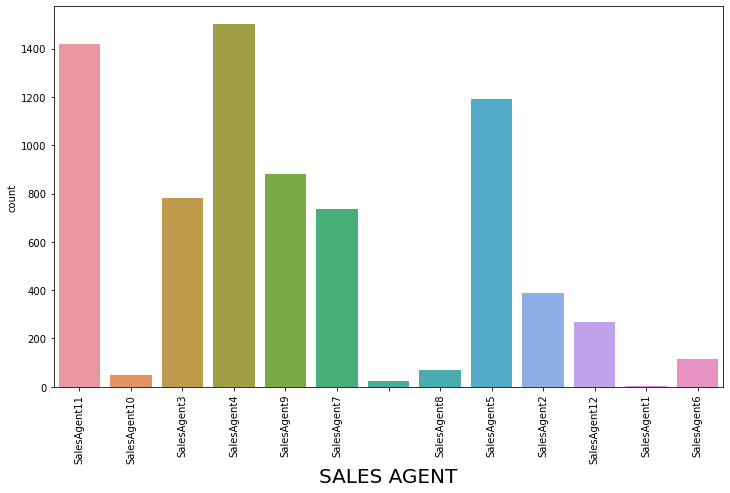

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data.Sales_Agent)
plt.xticks(rotation=90)
plt.xlabel('SALES AGENT',fontsize=20)
plt.show()

##### OBSERVATION:
* In this plot we are cleary seen the total 12 sales agent .
* Most of the sales is done by sales agent 4 and sales agent 11 as well as sales agent 5.
* Sales agent 3,9,7 has below than 850 sale.
* Remaining all sales agent has done less sale.

##### 4.LOCATION:

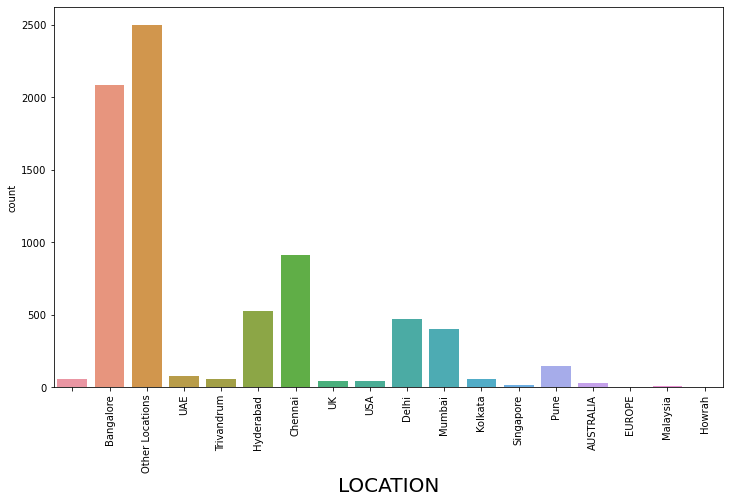

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(data.Location)
plt.xticks(rotation=90)
plt.xlabel('LOCATION',fontsize=20)
plt.show()

##### OBSERVATION:
* Total 17 location of sales with include foreign and india.
* Banglore and other location has more sales 
* chennai,hydrabad, delhi and mumbai city sale less than banglore and other location
* Remaining all city has extreme less sale.

##### 5.DELIVERY MODE

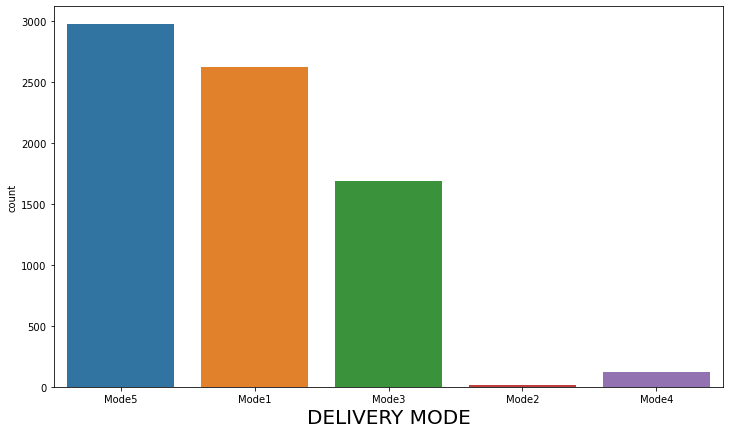

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data.Delivery_Mode)
plt.xlabel('DELIVERY MODE',fontsize=20)
plt.show()

##### OBSERVATION:
* In this plot we are clearly seen the five types of delivery mode.
* Delivery Mode 5 has maximum use as well as highest count
* Mode 1 & Mode 3 has less use than mode 5 
* Mode 2 & 4 is minimum use for delivery

##### 6.STATUS:

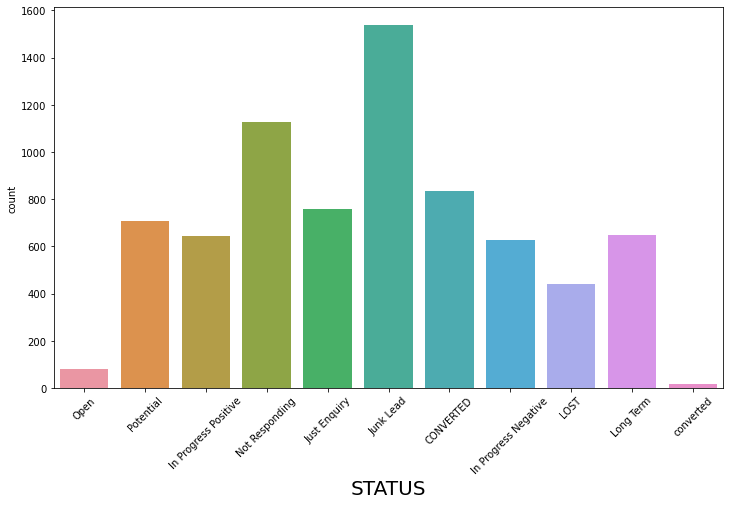

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data.Status)
plt.xticks(rotation=45)
plt.xlabel('STATUS',fontsize=20)
plt.show()

##### OBSERVATION:
* In this plot we are clearly seen the junk lead means low potential customer or client has more.
* Not responding status customer has less than 1200.
* From above graph we can say that low potential customer has more and high potential cutomer has less.

###  NOTE: 
* Here we can not perform any bivariate and multivarite analysis because we dont have any numerical feature so here we are apply certain condition and get most frequent label in feature.

#### 1.Getting the source call with the delivery mode-5

In [16]:
data.loc[(data.Source == "Call") & (data.Delivery_Mode == "Mode5")]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
19,13112018 1848,19,Call,701XXXXXXX,VALUE!,SalesAgent4,Other Locations,Mode5,Potential
28,13112018 1609,27,Call,994XXXXXXX,mXXXXXXXsmailcom,SalesAgent11,Chennai,Mode5,In Progress Positive
40,13112018 1226,9,Call,992XXXXXXX,gXXXXXXXologiesin,SalesAgent4,Chennai,Mode5,Potential
43,13112018 1129,2,Call,894XXXXXXX,VALUE!,SalesAgent9,Other Locations,Mode5,In Progress Positive
44,13112018 1129,9,Call,888XXXXXXX,sXXXXXXXelivecom,SalesAgent11,Bangalore,Mode5,In Progress Positive
...,...,...,...,...,...,...,...,...,...
7374,30042018 1038,15,Call,,VALUE!,SalesAgent11,Other Locations,Mode5,Junk Lead
7396,28042018 1612,15,Call,,VALUE!,SalesAgent7,Other Locations,Mode5,Junk Lead
7398,28042018 1611,15,Call,,VALUE!,SalesAgent2,Delhi,Mode5,Junk Lead
7399,28042018 1608,15,Call,,VALUE!,SalesAgent12,Other Locations,Mode5,In Progress Negative


In [17]:
# Get the percentqage of sorce call with delivery mode-5
len(data.loc[(data.Source == "Call") & (data.Delivery_Mode == "Mode5")])/7422*100

20.89733225545675

* Here almost 21% customer/client is preferred call with delivery mode-5

#### 2.Getting The sales agent 11 with potential status

In [18]:
data.loc[(data.Sales_Agent == 'SalesAgent11') & (data.Status == 'Potential')]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
24,13112018 1709,18,Website,790XXXXXXX,gXXXXXXXgmailcom,SalesAgent11,Trivandrum,Mode1,Potential
32,13112018 1515,27,Live ChatDirect,858XXXXXXX,VALUE!,SalesAgent11,Hyderabad,Mode3,Potential
35,13112018 1352,9,Website,900XXXXXXX,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Potential
51,13112018 1109,15,Call,994XXXXXXX,VALUE!,SalesAgent11,Other Locations,Mode5,Potential
70,12112018 1723,18,Website,902XXXXXXX,mXXXXXXXgmailcom,SalesAgent11,Chennai,Mode1,Potential
...,...,...,...,...,...,...,...,...,...
5878,05062018 1632,18,Website,,mXXXXXXXgmailcom,SalesAgent11,Hyderabad,Mode1,Potential
5881,05062018 1519,10,Website,,sXXXXXXXciscocom,SalesAgent11,Delhi,Mode1,Potential
6812,13052018 1620,27,Live ChatAdwords Remarketing,,gXXXXXXXgmailcom,SalesAgent11,Chennai,Mode3,Potential
6886,10052018 2130,5,,,aXXXXXXXjpwccom,SalesAgent11,Other Locations,Mode1,Potential


In [19]:
# Getting the percentage
len(data.loc[(data.Sales_Agent == 'SalesAgent11') & (data.Status == 'Potential')])/7422*100

3.354890864995958

* Sales-Agent-11 has only 3% potential customer.

#### 3.Getting all junck lead Status customer with percentage

In [20]:
data.loc[data['Status'] == 'Junk Lead']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
36,13112018 1334,19,Website,982XXXXXXX,vXXXXXXXgmailcom,SalesAgent7,Other Locations,Mode1,Junk Lead
74,12112018 1517,15,Call,883XXXXXXX,VALUE!,SalesAgent9,Other Locations,Mode5,Junk Lead
76,12112018 1515,15,Call,886XXXXXXX,VALUE!,SalesAgent11,Other Locations,Mode5,Junk Lead
88,12112018 1316,15,Call,790XXXXXXX,VALUE!,SalesAgent7,Other Locations,Mode5,Junk Lead
89,12112018 1316,15,Call,974XXXXXXX,VALUE!,SalesAgent11,Other Locations,Mode5,Junk Lead
...,...,...,...,...,...,...,...,...,...
7396,28042018 1612,15,Call,,VALUE!,SalesAgent7,Other Locations,Mode5,Junk Lead
7398,28042018 1611,15,Call,,VALUE!,SalesAgent2,Delhi,Mode5,Junk Lead
7401,28042018 1535,18,Live ChatBlog,,gXXXXXXXgmailcom,SalesAgent3,Chennai,Mode1,Junk Lead
7405,28042018 1335,18,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Junk Lead


In [21]:
# Getting the percentage
len(data.loc[data['Status'] == 'Junk Lead'])/7422*100

20.695230396119644

* Here 20% customer satuts is junk lead.

#### 4.Getting Banglore location with their percentage

In [22]:
data.loc[data['Location'] == 'Bangalore']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13112018 1851,9,Live ChatGoogle Organic,971XXXXXXX,mXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Potential
26,13112018 1637,18,Call,740XXXXXXX,nXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode1,In Progress Positive
31,13112018 1516,18,Call,953XXXXXXX,VALUE!,SalesAgent7,Bangalore,Mode1,Not Responding
33,13112018 1411,9,By Recommendation,974XXXXXXX,cXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode4,Potential
34,13112018 1353,9,Call,974XXXXXXX,VALUE!,SalesAgent4,Bangalore,Mode1,Potential
...,...,...,...,...,...,...,...,...,...
7409,28042018 1219,19,Call,,aXXXXXXXgmailcom,SalesAgent2,Bangalore,Mode4,Long Term
7410,28042018 1158,18,Call,,aXXXXXXXgmailcom,SalesAgent4,Bangalore,Mode1,CONVERTED
7412,28042018 1125,18,Just Dial,,cXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Long Term
7415,28042018 1050,21,Live ChatDirect,,aXXXXXXXgmailcom,SalesAgent4,Bangalore,Mode1,In Progress Negative


In [23]:
# Getting percentage
len(data.loc[data['Location'] == 'Bangalore'])/4722*100

44.13384159254553

* Maximum 44% Customer from bangalore.

#### 5.Getting the maximum selling product with their percentage

In [24]:
data.loc[data['Product_ID'] == '18']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
24,13112018 1709,18,Website,790XXXXXXX,gXXXXXXXgmailcom,SalesAgent11,Trivandrum,Mode1,Potential
26,13112018 1637,18,Call,740XXXXXXX,nXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode1,In Progress Positive
27,13112018 1635,18,Live ChatDirect,XXXXXXX,nXXXXXXXabirlacom,SalesAgent9,Other Locations,Mode3,Not Responding
31,13112018 1516,18,Call,953XXXXXXX,VALUE!,SalesAgent7,Bangalore,Mode1,Not Responding
37,13112018 1315,18,Live ChatGoogle Organic,754XXXXXXX,kXXXXXXXiimuacin,SalesAgent9,Bangalore,Mode1,In Progress Positive
...,...,...,...,...,...,...,...,...,...
7405,28042018 1335,18,Live ChatDirect,,sXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Junk Lead
7406,28042018 1320,18,Live ChatCPC,,mXXXXXXXgmailcom,SalesAgent2,Hyderabad,Mode1,LOST
7410,28042018 1158,18,Call,,aXXXXXXXgmailcom,SalesAgent4,Bangalore,Mode1,CONVERTED
7412,28042018 1125,18,Just Dial,,cXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Long Term


In [25]:
# Get percentage
len(data.loc[data['Product_ID'] == '18'])/4722*100

36.23464633629818

* 36% product id is 18

##### 6.Getting website source and open status with sales agent 10

In [26]:
data.loc[(data.Source == 'Website') & (data.Status == 'Open') ].head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,,Mode5,Open
1,14112018 0922,,Website,XXXXXXX,VALUE!,SalesAgent10,,Mode5,Open
2,14112018 0921,,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,,Mode5,Open
3,14112018 0846,,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,,Mode5,Open
4,14112018 0734,,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,,Mode5,Open


In [27]:
# Getting the percentage
len(data.loc[(data.Source == 'Website') & (data.Status == 'Open')])/4722*100

0.8047437526471835

* Here only 0.8% customer/client source is website and open status.

### DATA PREPROCESSING/FEATURE ENGINEERING

#### 1.CHECKING MISSING VALUE

In [28]:
# Replace blank spaces to nan 
data.replace('',np.nan,inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,NaN,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,NaN,Mode5,Open
1,14112018 0922,NaN,Website,XXXXXXX,VALUE!,SalesAgent10,NaN,Mode5,Open
2,14112018 0921,NaN,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,NaN,Mode5,Open
3,14112018 0846,NaN,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open
4,14112018 0734,NaN,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,NaN,Mode5,Open


In [29]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

* In this data set 5 feature contain missing value with including unique feature.
* Not handle unique feature missing value
* Remaining feature missing value impute with mode.

In [30]:
# 1.Product ID  
# use mode because of less product id as well as most frequent no.
data.Product_ID.mode()

0    18
dtype: object

In [31]:
data.loc[data['Product_ID'].isnull()==True,'Product_ID']= 18

In [32]:
# 2.Source -------> impute with mode because of categorical feature
data.Source.mode()

0    Call
dtype: object

In [33]:
data.loc[data['Source'].isnull()==True,'Source']= 'Call'


In [34]:
# 3.Sales agent -------> impute with mode because of categorical feature
data.Sales_Agent.mode()

0    SalesAgent4
dtype: object

In [35]:
data.loc[data['Sales_Agent'].isnull()==True,'Sales_Agent']= 'SalesAgent4'

In [36]:
# 4.Location --------> impute with mode because of categorical feature
data.Location.mode()

0    Other Locations
dtype: object

In [37]:
data.loc[data['Location'].isnull()==True,'Location']= 'Other Locations'

In [38]:
# Checking missing value after imputation
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

### 2.FEATURES IS CONTAIN LOTS OF DIFFERENT LABEL SO WE COMPRESSES AND MERGED THE LABEL

In [39]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,Website,984XXXXXXX,aXXXXXXXgmailcom,SalesAgent11,Other Locations,Mode5,Open
1,14112018 0922,18,Website,XXXXXXX,VALUE!,SalesAgent10,Other Locations,Mode5,Open
2,14112018 0921,18,Website,XXXXXXX,dXXXXXXXyahoocom,SalesAgent10,Other Locations,Mode5,Open
3,14112018 0846,18,Website,XXXXXXX,wXXXXXXXgmailcom,SalesAgent10,Other Locations,Mode5,Open
4,14112018 0734,18,Website,XXXXXXX,cXXXXXXXgmailcom,SalesAgent10,Other Locations,Mode5,Open


#### 1.PRODUCT ID

In [40]:
# In this feature 13 product id has been sold minimum so we can replace into minimum sold product
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','0','28','7','4'],'minimum sold',inplace=True)

#### 2.SOURCE

In [41]:
# This feature is contain total 25 label in that synthetic search/inquery of customer in different category
# so we make groups and put similar labels in one group like [(Live ChatDirect,Live ChatGoogle Organic,Live Chat PPC)--> live chats]


## 1st group ---- Live chat
data.Source.replace(['Live ChatDirect','Live ChatGoogle Organic','Live Chat PPC','Live ChatBlog','Live ChatCPC',
                    'Live ChatGoogle Ads','Live ChatAdwords Remarketing','Live ChatQuora','Live ChatYoutube',
                    'Live ChatJustdial'],'live chat',inplace=True)

In [42]:
## 2nd group ---- new client

data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'new client',inplace=True)

In [43]:
## 3rd group --- website

data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

In [44]:
## 4th group --- recommendation

data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

In [45]:
## 5th group ---- campign
data.Source.replace(['Campaign','Email Campaign','SMS Campaign','EMail Message'],'campaign',inplace=True)

In [46]:
# Checking the valu counts
data.Source.value_counts()

live chat         2677
Call              2564
Website           1594
recommendation     212
social             193
new client         146
campaign            34
Other                2
Name: Source, dtype: int64

#### 3.LOCATION

In [47]:
# This feature all country city location include so we are merge into different group

## 1st group ---- Other location
data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

## 2nd group --- 
data.Location.replace(['UAE','Malaysia','Singapore'],'asia',inplace=True)

## 3rd group 
data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)

In [48]:
data.Location.value_counts()

Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
asia                100
Name: Location, dtype: int64

#### 4.STATUS

In [49]:
# This is target veriable here we are seprate the label & make group like high potential, and low potential

## 1st group --- low potential
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)

## 2nd group --- high potential
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [50]:
data.Status.value_counts()

low potential     4491
high potential    2931
Name: Status, dtype: int64

### 3.CATEGORICAL DATA CONVERSION

In [51]:
## 1.Product_ID

# here we use frequency encoding because of mannual encoding is work 
# Assign with zero because minimum sold product
data.loc[data['Product_ID']=='minimum sold','Product_ID']=0

In [52]:
## 2.Source --------> frequency encoding

# because of maximum label and nominal data-type
data.loc[data['Source']=='live chat','Source']=7
data.loc[data['Source']=='Call','Source']=6
data.loc[data['Source']=='Website','Source']=5
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=3
data.loc[data['Source']=='new client','Source']=2
data.loc[data['Source']=='campaign','Source']=1
data.loc[data['Source']=='Other','Source']=0

In [53]:
## 3.Sales Agent ----------> frequency encoding

# because of maximum label and nominal data-type
data.loc[data['Sales_Agent']=='SalesAgent4','Sales_Agent']=11
data.loc[data['Sales_Agent']=='SalesAgent11','Sales_Agent']=10
data.loc[data['Sales_Agent']=='SalesAgent5','Sales_Agent']=9
data.loc[data['Sales_Agent']=='SalesAgent9','Sales_Agent']=8
data.loc[data['Sales_Agent']=='SalesAgent3','Sales_Agent']=7
data.loc[data['Sales_Agent']=='SalesAgent7','Sales_Agent']=6
data.loc[data['Sales_Agent']=='SalesAgent2','Sales_Agent']=5
data.loc[data['Sales_Agent']=='SalesAgent12','Sales_Agent']=4
data.loc[data['Sales_Agent']=='SalesAgent6','Sales_Agent']=3
data.loc[data['Sales_Agent']=='SalesAgent8','Sales_Agent']=2
data.loc[data['Sales_Agent']=='SalesAgent10','Sales_Agent']=1
data.loc[data['Sales_Agent']=='SalesAgent1','Sales_Agent']=0



In [54]:
## 4.Location --------> frequency encoding

# because of maximum label and nominal data-type
data.loc[data['Location']=='Other Locations','Location']=8
data.loc[data['Location']=='Bangalore','Location']=7
data.loc[data['Location']=='Chennai','Location']=6
data.loc[data['Location']=='Hyderabad','Location']=5
data.loc[data['Location']=='Delhi','Location']=4
data.loc[data['Location']=='Mumbai','Location']=3
data.loc[data['Location']=='Pune','Location']=2
data.loc[data['Location']=='west country','Location']=1
data.loc[data['Location']=='asia','Location']=0


In [55]:
## 4. Delivery_Mode--------> frequency encoding

# because of maximum label and nominal data-type
data.loc[data['Delivery_Mode'] == 'Mode5','Delivery_Mode']=4
data.loc[data['Delivery_Mode'] == 'Mode1','Delivery_Mode']=3
data.loc[data['Delivery_Mode'] == 'Mode3','Delivery_Mode']=2
data.loc[data['Delivery_Mode'] == 'Mode4','Delivery_Mode']=1
data.loc[data['Delivery_Mode'] == 'Mode2','Delivery_Mode']=0


In [56]:
## 5. Status--------> one hot encoding

# because of only two labels and nominal data-typa
data.loc[data['Status']=='low potential','Status']=1
data.loc[data['Status']=='high potential','Status']=0

In [57]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14112018 1005,18,5,984XXXXXXX,aXXXXXXXgmailcom,10,8,4,0
1,14112018 0922,18,5,XXXXXXX,VALUE!,1,8,4,0
2,14112018 0921,18,5,XXXXXXX,dXXXXXXXyahoocom,1,8,4,0
3,14112018 0846,18,5,XXXXXXX,wXXXXXXXgmailcom,1,8,4,0
4,14112018 0734,18,5,XXXXXXX,cXXXXXXXgmailcom,1,8,4,0


### FEATURE SELECTION

### 1.DROP UNIQUE AND CONSTANT COLUMN
* In this dataset total 3 unique column available(created, mobile, and email) so im drop this column.
* Product_Id is not unique column in this data so we are not drop this column

In [58]:
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [59]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,5,10,8,4,0
1,18,5,1,8,4,0
2,18,5,1,8,4,0
3,18,5,1,8,4,0
4,18,5,1,8,4,0


### 2.CHANGING DATA TYPE BEFORE GET CORRELATION

In [60]:
# First converet the data-type of all feature because all feature data-type is object
data_type_dict = {'Product_ID':'int64','Source':'int64','Sales_Agent':'int64','Location':'int64','Delivery_Mode':'int64',
             'Status':'int64'}

data = data.astype(data_type_dict)


In [61]:
# Get data type of all feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int64
 1   Source         7422 non-null   int64
 2   Sales_Agent    7422 non-null   int64
 3   Location       7422 non-null   int64
 4   Delivery_Mode  7422 non-null   int64
 5   Status         7422 non-null   int64
dtypes: int64(6)
memory usage: 348.0 KB


### 3.CHECKING CORRELATION

In [62]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,-0.009651,0.009770,-0.028297,-0.019310,-0.090575
Source,-0.009651,1.000000,0.020959,-0.156931,-0.035514,0.061368
Sales_Agent,0.009770,0.020959,1.000000,-0.114022,0.096164,0.087726
Location,-0.028297,-0.156931,-0.114022,1.000000,0.209398,0.080861
Delivery_Mode,-0.019310,-0.035514,0.096164,0.209398,1.000000,0.161352
Status,-0.090575,0.061368,0.087726,0.080861,0.161352,1.000000


#### PLOTTING HEATMAP OF CORRELATION

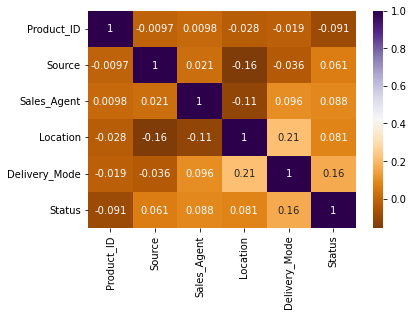

In [63]:
sns.heatmap(data.corr(),annot=True,cmap='PuOr')
plt.show()

* No highly correlated feature available.

#### NOTE:
I'm not handel any duplicates because of I'm compressed and mereged labels.

### SAVE PREPROCESS DATA

In [64]:
data.to_csv("preprocess.csv")
df = pd.read_csv("preprocess.csv")
df.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,18,5,10,8,4,0
1,1,18,5,1,8,4,0
2,2,18,5,1,8,4,0
3,3,18,5,1,8,4,0
4,4,18,5,1,8,4,0


## MODEL CREATION

### AIM:
* Create a sweet spots model [Low bias and Low veriance model]
* Improve accuracy score

### HERE WE WILL BE EXPERIMENTING WITH SEVEN ALGORITHM

1. Logistic regression.
2. KNeighbourClassifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Grediant Boosting Classifier
6. XGB classifier
7. Artifical neural network


#### DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [65]:
X = df.iloc[:,1:6]
y = df.Status

In [66]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,18,5,10,8,4
1,18,5,1,8,4
2,18,5,1,8,4
3,18,5,1,8,4
4,18,5,1,8,4


In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

#### BALANCING THE TARGET COLUMN USING SMOTE

In [68]:
df.Status.value_counts()

1    4491
0    2931
Name: Status, dtype: int64

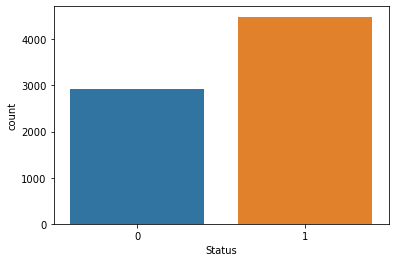

In [69]:
# Plotting the graph
sns.countplot(data.Status)
plt.show()

In [70]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE() #object creation
print("unbalanced data",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print('Balanced data',Counter(y_sm))

unbalanced data Counter({1: 4491, 0: 2931})
Balanced data Counter({0: 4491, 1: 4491})


#### SPLIT TRAINING AND TESTING DATA

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [72]:
X_train.shape

(7185, 5)

In [73]:
X_test.shape

(1797, 5)

In [74]:
y_train.shape

(7185,)

In [75]:
y_test.shape

(1797,)

### 1.Logistic Regression

In [76]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_reg = LogisticRegression(random_state=5)

# Step:3 fitting the training data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [77]:
# Import library
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 59.832985386221296
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.59      0.60      3599
           1       0.60      0.60      0.60      3586

    accuracy                           0.60      7185
   macro avg       0.60      0.60      0.60      7185
weighted avg       0.60      0.60      0.60      7185



* Logistic regression model not perform well on training data.

#### TEST ACCURACY

In [78]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 60.37840845854201
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.62      0.61       920
           1       0.59      0.59      0.59       877

    accuracy                           0.60      1797
   macro avg       0.60      0.60      0.60      1797
weighted avg       0.60      0.60      0.60      1797



* Logistic regression model also not perform well on testing data

### 2.KNeighboursClassifier

In [79]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.29271007234279356, 0.29660545353366724, 0.2810239287701725, 0.27657206455203115, 0.27378964941569284, 0.27824151363383415, 0.27434613244296047, 0.2810239287701725, 0.27545909849749584]


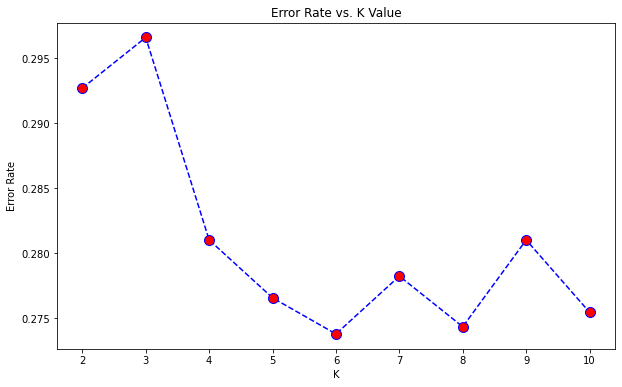

In [81]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [82]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)


### EVALUATION

#### TRAINING ACCURACY

In [83]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  77.91231732776617
Training classification report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      4412
           1       0.66      0.87      0.75      2773

    accuracy                           0.78      7185
   macro avg       0.78      0.80      0.78      7185
weighted avg       0.81      0.78      0.78      7185



* KNN claaifier model is slightly perform well on training data

#### TESTING ACCURACY

In [84]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 71.89760712298275
Testing classification report: 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       926
           1       0.76      0.61      0.68       871

    accuracy                           0.72      1797
   macro avg       0.73      0.72      0.71      1797
weighted avg       0.73      0.72      0.72      1797



* But testing score is still lagging so i apply bagging

#### USE BAGGING ON KNEIGHBOURS CLASSIFIER

In [85]:
# step:1 Create a K-neighbour classifier object
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

#### EVALUATION

In [86]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 72.56538675570395


* After apply bagging score is slightly improve

### 3.Decision Tree 

In [87]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
dtc_test_predict = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [88]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 84.64857341684065
classification report of training:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      3565
           1       0.89      0.79      0.84      3620

    accuracy                           0.85      7185
   macro avg       0.85      0.85      0.85      7185
weighted avg       0.85      0.85      0.85      7185



* Decision tree classifier well train on training data

#### TESTING ACCURACY

In [89]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 71.39677239844184
classification report of training:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       926
           1       0.72      0.67      0.69       871

    accuracy                           0.71      1797
   macro avg       0.71      0.71      0.71      1797
weighted avg       0.71      0.71      0.71      1797



* But Not perform well on testing data so I apply hyperparameter tunning

#### HYPER PARAMETER TUNNING

In [90]:
# Step:1 importing library
from sklearn.model_selection import GridSearchCV

# Step:2 Tunning the parameter
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 30))), 
    "min_samples_split":[2, 3, 4,5], 
    "min_samples_leaf":list(range(1, 10)), 
}


tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting traning data
tree_cv.fit(X_train,y_train)

# Get the best parameter
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")



Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best paramters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [91]:
# Step:3 place the parameter on decision tree classifier
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=13,min_samples_leaf=1,
                           min_samples_split=2,splitter='best')

In [92]:
# Step:4 fitting training data
dt1.fit(X_train,y_train)

# Step:5 prdiction on testing data
yhat = dt1.predict(X_test)


#### EVALUATION

In [93]:
dt1_test_accuracy = accuracy_score(y_test,yhat)
print("Accuracy score:",dt1_test_accuracy*100)
print("Classification report:"'\n',classification_report(y_test,yhat))

Accuracy score: 71.28547579298832
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       926
           1       0.71      0.68      0.70       871

    accuracy                           0.71      1797
   macro avg       0.71      0.71      0.71      1797
weighted avg       0.71      0.71      0.71      1797



* Score Not improve after hyper-parameter tunning

### 4.Random Forest Classifier

In [94]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

### EVALUATION
#### TRAINING ACCURACY

In [95]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 84.64857341684065
Classification report of training:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      3565
           1       0.87      0.82      0.84      3620

    accuracy                           0.85      7185
   macro avg       0.85      0.85      0.85      7185
weighted avg       0.85      0.85      0.85      7185



* Random forest model well train on training data.

#### TESTING ACCURACY

In [96]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 72.45409015025042
Classification report of training:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       926
           1       0.72      0.72      0.72       871

    accuracy                           0.72      1797
   macro avg       0.72      0.72      0.72      1797
weighted avg       0.72      0.72      0.72      1797



* But not perform well on testing side so i need to apply hyperparmeter tunning

#### HYPER PARAMETER TUNNING

In [97]:
# Step:1 [imutation of parameter]
from sklearn.model_selection import RandomizedSearchCV
# not used grid search cv beacuse memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] ### auto - select randomly, sqrt - 
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] ### level in the tree
max_depth.append(None)
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 4]


# Step:2 make a dictionary of parameter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf1 = RandomForestClassifier(random_state=42) 
# provide random state beacuse select row and column randomly


# Step:4 randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


# Step:5 fitting the training data
rf_cv.fit(X_train, y_train)

# Step:6 Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1366, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 98})


In [98]:
# Step:7 
rf_clf2 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf2.fit(X_train,y_train)

# Step:9 Prediction on test data
y_predict = rf_clf2.predict(X_test)


#### EVALUATION

In [99]:
test_accuracy = accuracy_score(y_test,y_predict)
print("Testing accuracy after hyper parameter tunning:",test_accuracy*100)

Testing accuracy after hyper parameter tunning: 73.3444629938787


* Random forest testing score after hyper parameter tunning.

### 5.Geadient Boosting Classifier

In [100]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(X_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(X_train)


### EVALUATION
#### TRAINING ACCURACY

In [101]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 74.23799582463465
Classification report of training:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      3565
           1       0.76      0.71      0.74      3620

    accuracy                           0.74      7185
   macro avg       0.74      0.74      0.74      7185
weighted avg       0.74      0.74      0.74      7185



#### TESTING ACCURACY

In [102]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 74.06789092932665
Classification report of testing:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       926
           1       0.74      0.72      0.73       871

    accuracy                           0.74      1797
   macro avg       0.74      0.74      0.74      1797
weighted avg       0.74      0.74      0.74      1797



* Grediant bossting classifier is well work on training and testing side.

### 6.XGB Classifier

In [103]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION

#### TRAINING ACCURACY

In [104]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 80.13917884481559
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      3810
           1       0.77      0.82      0.80      3375

    accuracy                           0.80      7185
   macro avg       0.80      0.80      0.80      7185
weighted avg       0.80      0.80      0.80      7185



* XGB classifier model is not perform well on training side

#### TEST ACCURACY

In [105]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 73.51140790205899
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       940
           1       0.72      0.73      0.72       857

    accuracy                           0.74      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.74      0.74      0.74      1797



* Testing score still lagging

#### HYPER PARAMETER TUNNING

In [116]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02,0.003, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [3,5,6,7,8,10],
              'n_estimators': [50,65,80,100,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=150,
                        cv=5,verbose=3,random_state=5,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:4 Fitting training data on randomized search cv
rcv.fit(X_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameter: {'reg_lambda': 25.6, 'reg_alpha': 0.8, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.4, 'gamma': 0.2}


In [117]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=25.6,reg_alpha=0.8,n_estimators=150,max_depth=10,learning_rate=0.4,gamma=0.2)

# Step:7 Fitting the training data
XGB2.fit(X_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(X_test)

In [118]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
print("Classification report: \n",classification_report(XGB_prediction,y_test))

Accuracy score after hyperparameter tunning 73.06622148024485
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       924
           1       0.72      0.72      0.72       873

    accuracy                           0.73      1797
   macro avg       0.73      0.73      0.73      1797
weighted avg       0.73      0.73      0.73      1797



* After hyper-parameter tunning score is slightly improve

### 7.Artifial Neural Network

In [129]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(X_train,y_train)



MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [130]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.41089402, 0.58910598],
       [0.66882247, 0.33117753],
       [0.75355294, 0.24644706],
       ...,
       [0.68326288, 0.31673712],
       [0.07805517, 0.92194483],
       [0.42583326, 0.57416674]])

In [131]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

#### TRAINING ACCURACY

In [132]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 69.2275574112735
Classification report of training:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72      4408
           1       0.58      0.75      0.65      2777

    accuracy                           0.69      7185
   macro avg       0.69      0.70      0.69      7185
weighted avg       0.72      0.69      0.70      7185



#### TESTING ACCURACY

In [133]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 69.1151919866444
Classification report of testing:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1121
           1       0.57      0.73      0.64       676

    accuracy                           0.69      1797
   macro avg       0.69      0.70      0.69      1797
weighted avg       0.72      0.69      0.70      1797



* ANN model not perform well on training as well as testing data

### CONCLUSION
* From above all model Im select Grediant Bossting classifier beacuse this model perform well on training as well as testing side and low variance and low bias model.

### MODEL SAVING

In [ ]:
# Model saving using pickel
import pickle

file = open("gbm_classifier_model.pkl","wb")

# Dump information on file
pickle.dump(gbm,file)